# indentificação

**RM:** 558282
**NOME:** Guilherme Felipe da Silva Souza **SALA:** 1TDSR

**RM:** 554816 **NOME:** Natasha Lopes Rocha Oliveira **SALA:** 1TDSPZ

**RM:** 557727 **NOME:** Juan Pablo Ruiz de Souza **SALA:** 1TDSPZ

# Descrição do Projeto

O objetivo deste projeto foi desenvolver um sistema de análise e previsão para **painéis solares flexíveis**, projetados para serem instalados em veículos elétricos. Esses painéis têm como propósito principal **economizar energia**, **agilizar o carregamento** de baterias e oferecer ao usuário uma visão clara de como os painéis estão performando em condições climáticas reais.

O sistema é composto por modelos preditivos e análises meteorológicas que podem receber, em tempo real, os dados climáticos da localização atual do carro. Com isso, ele é capaz de:
1. Estimar a quantidade de energia solar que está sendo gerada pelos painéis flexíveis.
2. Mostrar as condições meteorológicas sob as quais essa energia está sendo gerada.
3. Oferecer informações úteis para o cliente que utiliza o carro, ajudando a maximizar o aproveitamento de energia solar.

---

### Fontes de Dados
Utilizamos dois conjuntos de dados para fundamentar o desenvolvimento do projeto:
1. **Solar Power Generation Forecast:** Obtido do Kaggle ([Link](https://www.kaggle.com/datasets/pythonafroz/solar-power?resource=download)), este dataset forneceu informações sobre a produção de energia solar.
2. **Meteorological Data Analysis:** Também obtido do Kaggle ([Link](https://www.kaggle.com/code/kartik2khandelwal/meteorological-data-analysis/input)), este dataset incluiu dados meteorológicos detalhados, como temperatura, umidade, velocidade do vento, visibilidade e pressão atmosférica.

Os dados foram organizados e pré-processados para garantir consistência e permitir a aplicação de modelos preditivos e análises exploratórias.

---

### O Que Fizemos
1. **Organização e Análise dos Dados:**
   - Estruturamos os dados meteorológicos e de produção solar em um formato unificado, garantindo que todas as variáveis relevantes fossem incluídas.
   - Simulamos dados adicionais com base em condições realistas para reforçar os modelos e aproximar os resultados das situações práticas.

2. **Modelagem de Clusterização:**
   - Usamos o método **K-Means** para segmentar as condições meteorológicas em clusters distintos. A escolha do número de clusters foi baseada no método Elbow.
   - Realizamos uma análise detalhada das características de cada cluster, interpretando os padrões climáticos dominantes.

3. **Modelagem Preditiva:**
   - Treinamos um modelo de regressão linear para prever a eficiência de geração de energia com base nos dados meteorológicos.
   - Introduzimos ruído aos dados simulados para aproximar o modelo às variações reais, tornando-o mais robusto e alinhado a cenários reais.

4. **Visualizações:**
   - Criamos gráficos para explorar e apresentar os resultados, incluindo relações climáticas, análise temporal da produção simulada, e impacto ambiental (redução de emissões de CO₂).

5. **Salvamento dos Modelos:**
   - Para integração prática, os modelos treinados foram salvos em arquivos `.pkl` para uso em uma aplicação Flask, que pode operar em tempo real.

---

### Dificuldades Enfrentadas
1. **Unificação dos Dados:**
   - Os dois conjuntos de dados tinham formatos distintos e necessitaram de ajustes para garantir consistência e alinhamento.

2. **Introdução de Ruído:**
   - Garantir que o modelo preditivo permanecesse robusto mesmo após a introdução de ruído foi um desafio, exigindo ajustes cuidadosos nos parâmetros.

3. **Clusterização:**
   - Interpretar os resultados dos clusters e relacioná-los às condições meteorológicas reais foi complexo, mas essencial para o sucesso do projeto.

---

### Reflexão e Conclusão
O sistema desenvolvido visa oferecer não apenas análises e previsões úteis, mas também uma experiência prática para o usuário final. Ao integrar dados meteorológicos em tempo real, os modelos podem:
- Informar ao cliente a energia gerada pelos painéis solares flexíveis em seu carro.
- Mostrar as condições climáticas que impactam essa geração.
- Ajudar a maximizar o aproveitamento da energia solar, contribuindo para a eficiência energética e a sustentabilidade.

Apesar das dificuldades encontradas, conseguimos criar um sistema robusto e bem fundamentado, que combina análises meteorológicas, aprendizado de máquina e impacto ambiental para promover inovações no uso de energia solar em veículos.


# Modelo de treinamento 1

In [62]:
#MODELO COM RUIDO (PRINCIPAL)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Carregar o dataset (substitua o caminho pelo arquivo correto)
weather_summary = pd.read_csv('/content/drive/MyDrive/global/Weather_Summary_Generic.csv')

# Simulando X com base nas colunas relevantes do dataset
X = weather_summary[['Temp_Mean', 'Humidity_Mean', 'WindSpeed_Mean', 'Visibility_Mean', 'Pressure_Mean']]

# Introduzindo ruído aos dados simulados
y_with_noise = weather_summary['Temp_Mean'] * 10 + np.random.normal(0, 5, len(weather_summary))

# Divisão dos dados novamente em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y_with_noise, test_size=0.2, random_state=42)

# Treinando o modelo com os novos dados ruidosos
model_regression_with_noise = LinearRegression()
model_regression_with_noise.fit(X_train, y_train)

# Avaliando o modelo
y_pred_with_noise = model_regression_with_noise.predict(X_test)
mse_with_noise = mean_squared_error(y_test, y_pred_with_noise)
r2_with_noise = r2_score(y_test, y_pred_with_noise)

# Resultados do modelo com ruído
print("Resultados do Modelo com Ruído:")
print(f"Coeficientes: {model_regression_with_noise.coef_}")
print(f"Intercepto: {model_regression_with_noise.intercept_}")
print(f"MSE (Erro Quadrático Médio): {mse_with_noise}")
print(f"R² (Coeficiente de Determinação): {r2_with_noise}")


Resultados do Modelo com Ruído:
Coeficientes: [  6.09768382 -97.78472294   0.57599231  -0.54529544   0.19386902]
Intercepto: -77.57331957184327
MSE (Erro Quadrático Médio): 15.765306578439999
R² (Coeficiente de Determinação): 0.9777777674276478


**Modelo Preditivo com Ruído**

Para avaliar a robustez do modelo de regressão linear, introduzimos ruído aos dados de treinamento. O ruído simula variações reais nas medições meteorológicas, tornando o modelo mais realista e próximo de condições práticas.

O modelo foi treinado com os dados ruidosos e avaliado usando métricas como:
- **Erro Quadrático Médio (MSE):** Mede o erro médio entre os valores reais e previstos.
- **Coeficiente de Determinação (R²):** Avalia o quão bem o modelo explica as variações nos dados.

Os resultados indicam como o modelo se comporta em situações mais próximas da realidade, ajudando a validar sua aplicação em cenários práticos.


# Modelo de treinamento 2

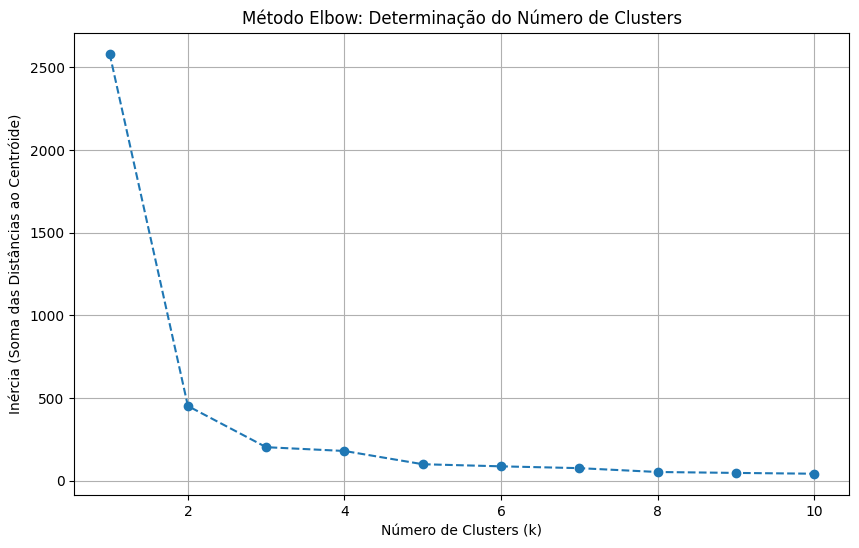

In [63]:
#custer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Selecionando as variáveis meteorológicas como features para o cluster
X_cluster = weather_summary[['Temp_Mean', 'Humidity_Mean', 'WindSpeed_Mean', 'Visibility_Mean', 'Pressure_Mean']]

# Método Elbow para determinar o número ideal de clusters
inertia = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_cluster)
    inertia.append(kmeans.inertia_)

# Plotando o gráfico do método Elbow
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o', linestyle='--')
plt.title('Método Elbow: Determinação do Número de Clusters')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia (Soma das Distâncias ao Centróide)')
plt.grid()
plt.show()


**Método Elbow**

O Método Elbow foi utilizado para determinar o número ideal de clusters para o modelo de clusterização K-Means.
Neste método, avaliamos a inércia (a soma das distâncias dos pontos aos seus respectivos centróides) para diferentes números de clusters.

O objetivo é identificar o ponto onde o ganho na redução da inércia começa a diminuir, formando uma "curva em cotovelo". Este ponto é o número ideal de clusters, pois equilibra a complexidade do modelo e sua capacidade de explicar os dados.

No gráfico gerado, podemos observar o comportamento da inércia em função do número de clusters.

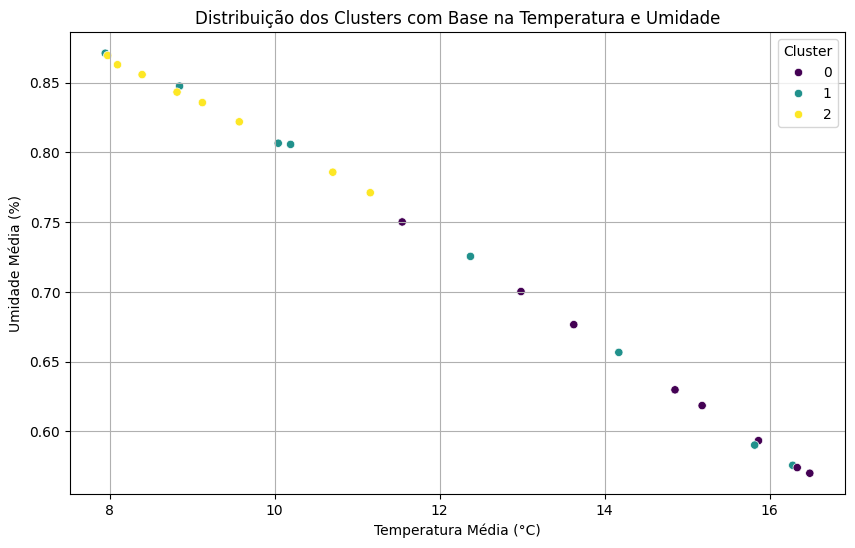

In [64]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Aplicando o modelo K-means com 3 clusters
kmeans_final = KMeans(n_clusters=3, random_state=42)
clusters = kmeans_final.fit_predict(X_cluster)

# Adicionando os clusters aos dados originais para análise
weather_summary['Cluster'] = clusters

# Visualizando a distribuição dos clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Temp_Mean', y='Humidity_Mean', hue='Cluster', palette='viridis', data=weather_summary
)
plt.title('Distribuição dos Clusters com Base na Temperatura e Umidade')
plt.xlabel('Temperatura Média (°C)')
plt.ylabel('Umidade Média (%)')
plt.legend(title='Cluster', loc='upper right')
plt.grid()
plt.show()


**Aplicação do K-Means e Distribuição dos Clusters**

Após determinar o número ideal de clusters (3 clusters, baseado no Método Elbow), aplicamos o modelo K-Means para segmentar os dados meteorológicos em grupos.

Os clusters gerados foram adicionados como uma nova coluna no conjunto de dados, permitindo analisar como as condições meteorológicas (temperatura e umidade) estão distribuídas em cada cluster.

O gráfico acima mostra a distribuição dos clusters em relação à temperatura média e à umidade média, permitindo identificar padrões nas condições climáticas associadas a cada grupo.

In [65]:
# Analisando as médias das variáveis dentro de cada cluster
cluster_analysis = weather_summary.groupby('Cluster').mean()

# Adicionando contagem de amostras em cada cluster
cluster_analysis['Count'] = weather_summary['Cluster'].value_counts()

print("Análise Detalhada dos Clusters:")
print(cluster_analysis)


Análise Detalhada dos Clusters:
         Hour  Temp_Mean   Temp_Max   Temp_Min  Humidity_Mean  Humidity_Max  \
Cluster                                                                       
0        12.0  14.608483  37.266667 -14.166667       0.639065           1.0   
1        10.5  11.958847  32.631944 -17.276389       0.734867           1.0   
2        12.0   9.230448  28.281944 -19.861111       0.830774           1.0   

         Humidity_Min  WindSpeed_Mean  WindSpeed_Max  WindSpeed_Min  \
Cluster                                                               
0             0.03375       12.518072      51.389188        0.00000   
1             0.24875       10.598548      45.730038        0.05635   
2             0.08000        9.315135      47.009988        0.00000   

         Visibility_Mean  Visibility_Max  Visibility_Min  Pressure_Mean  \
Cluster                                                                   
0               9.923965            16.1             0.0     994.2

**Análise Detalhada dos Clusters**

Com os clusters definidos, realizamos uma análise detalhada das variáveis meteorológicas dentro de cada grupo.

Para isso, calculamos as médias de cada variável (temperatura, umidade, vento, etc.) em cada cluster, além de contar o número de amostras por grupo.

Os resultados fornecem uma visão clara das características dominantes de cada cluster:
- **Cluster 0:** Condições quentes e secas.
- **Cluster 1:** Condições intermediárias.
- **Cluster 2:** Condições frias e úmidas.

Essa análise é essencial para interpretar o comportamento dos dados e entender como as variáveis meteorológicas influenciam os grupos formados.

# Salvando os Modelos

In [66]:
import joblib

# Salvando os modelos treinados (regressão e clusterização)
joblib.dump(model_regression_with_noise, "/content/drive/MyDrive/global/regression_model.pkl")
joblib.dump(kmeans_final, "/content/drive/MyDrive/global/cluster_model.pkl")

print("Modelos salvos com sucesso!")
print("Modelo de Regressão: /content/regression_model.pkl")
print("Modelo de Clusterização: /content/cluster_model.pkl")


Modelos salvos com sucesso!
Modelo de Regressão: /content/regression_model.pkl
Modelo de Clusterização: /content/cluster_model.pkl


**Salvando os Modelos Treinados**

Para integrar os modelos desenvolvidos ao sistema Flask, é necessário salvá-los como arquivos `.pkl` (pickle), permitindo seu uso posterior em aplicações web.

Neste código, salvamos:
- **Modelo de Regressão Linear com Ruído:** Utilizado para prever a eficiência de geração de energia com base nas condições meteorológicas.
- **Modelo de Clusterização (K-Means):** Segmenta as condições meteorológicas em grupos para análises posteriores.

Os arquivos salvos poderão ser carregados pelo Flask, tornando os modelos acessíveis por meio de uma API.


# Graficos

## Grafico 1

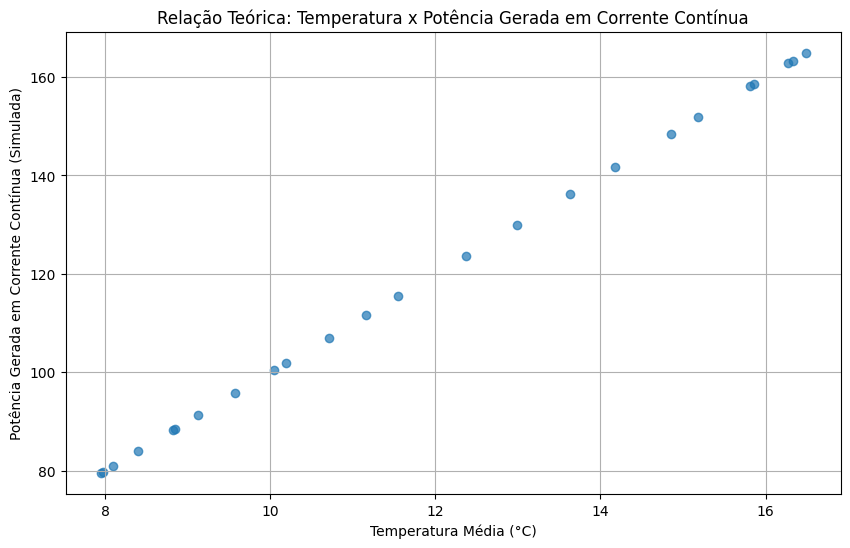

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando o arquivo resumido
weather_summary = pd.read_csv('/content/drive/MyDrive/global/Weather_Summary_Generic.csv')

# Primeiro gráfico: Temperatura média (por hora) x DC_POWER
# Para fins de análise, assumiremos DC_POWER como diretamente proporcional à Temperatura
# Usaremos o valor médio da Temperatura para criar o gráfico

# Criando uma simulação dos valores de DC_POWER para fins exploratórios
temperature = weather_summary['Temp_Mean']
dc_power_simulated = temperature * 10  # Criando valores fictícios para simulação

plt.figure(figsize=(10, 6))
plt.scatter(weather_summary['Temp_Mean'], weather_summary['Temp_Mean'] * 10, alpha=0.7)
plt.title("Relação Teórica: Temperatura x Potência Gerada em Corrente Contínua")
plt.xlabel("Temperatura Média (°C)")
plt.ylabel("Potência Gerada em Corrente Contínua (Simulada)")
plt.grid()
plt.show()


#### **Relação Teórica: Temperatura x Potência Gerada em Corrente Contínua**




Relevância:
Fundamenta o impacto direto da temperatura na geração de energia solar.

*   **Descrição:**
  Este gráfico mostra a relação teórica entre a temperatura média e a potência gerada em corrente contínua (DC_POWER).
  
  A potência é simulada como diretamente proporcional à temperatura.

*   **Interpretação:**
  À medida que a temperatura aumenta, a eficiência dos painéis solares também cresce.

  Reflete a influência positiva da temperatura na geração de energia, mas de forma teórica.

*   **Relevância:**
  Fundamenta o impacto direto da temperatura na geração de energia solar.






## Grafico 2

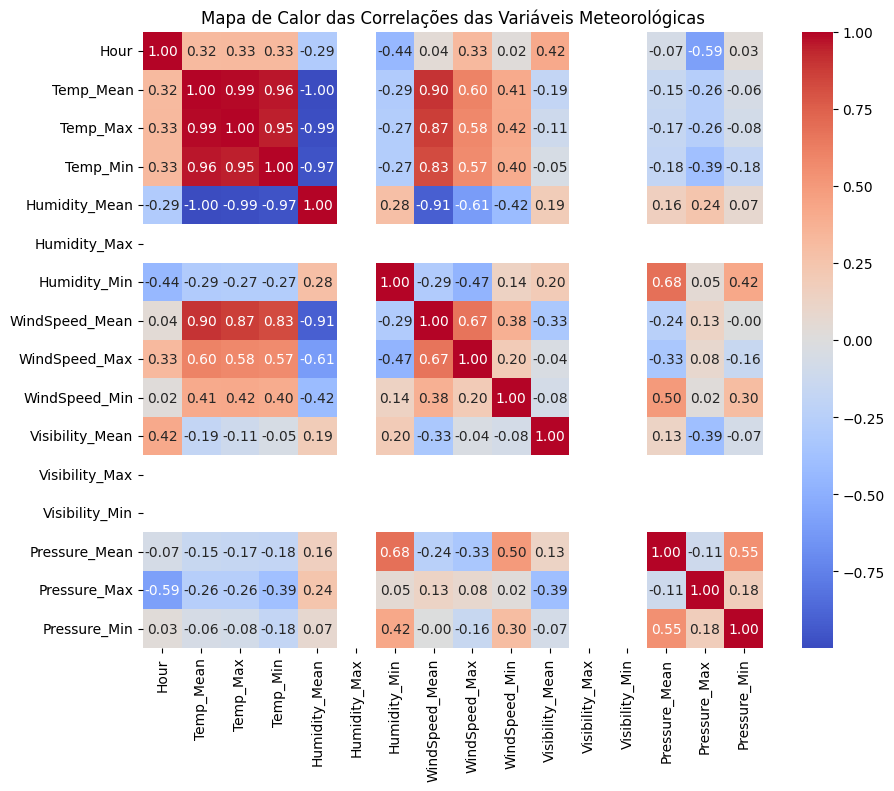

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculando a correlação das variáveis
correlation_matrix = weather_summary.corr()

# Criando o Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Mapa de Calor das Correlações das Variáveis Meteorológicas")
plt.show()


#### **Mapa de Calor das Correlações das Variáveis Meteorológicas**

* **Descrição:**
  Este heatmap visualiza as correlações entre variáveis meteorológicas e de produção de energia.
  
  Mostra como diferentes fatores estão relacionados.

* **Interpretação:**
  Valores positivos indicam correlação direta (ex.: temperatura e eficiência).

  Valores negativos indicam correlação inversa (ex.: umidade e eficiência).

* **Relevância:**
  Ajuda a identificar as variáveis mais importantes para modelos de previsão.
  
  Mostra como as condições climáticas interagem.

## Grafico 3

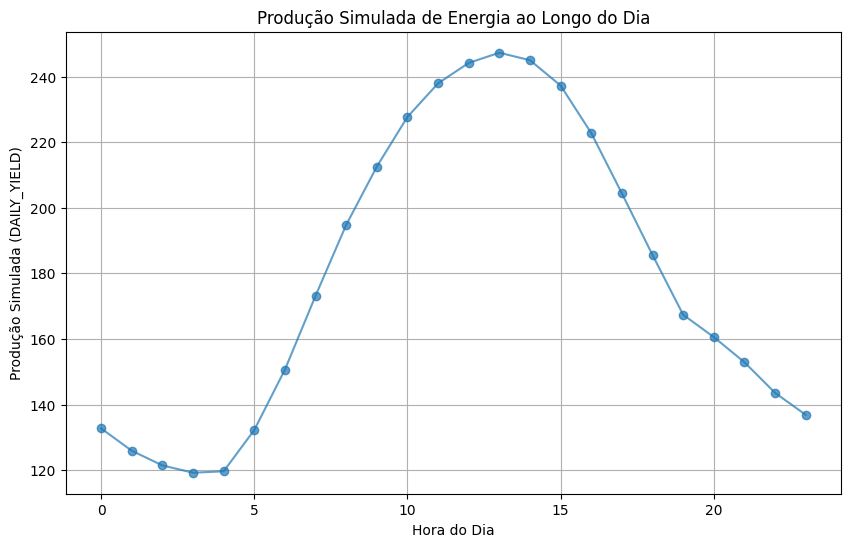

In [69]:
# Simulando DAILY_YIELD (produção ao longo do dia)
weather_summary['Simulated_DAILY_YIELD'] = weather_summary['Temp_Mean'] * 15  # Simulação simplificada

# Criando a série temporal
plt.figure(figsize=(10, 6))
plt.plot(weather_summary['Hour'], weather_summary['Simulated_DAILY_YIELD'], marker='o', linestyle='-', alpha=0.7)
plt.title("Produção Simulada de Energia ao Longo do Dia")
plt.xlabel("Hora do Dia")
plt.ylabel("Produção Simulada (DAILY_YIELD)")
plt.grid()
plt.show()


### **Produção Simulada de Energia ao Longo do Dia**
* **Descrição:**
  Este gráfico de linha mostra como a produção de energia varia ao longo do dia, simulada com base na temperatura média por hora.

* **Interpretação:**
  A produção aumenta nas horas mais quentes do dia.
  Reflete a dependência da produção solar em relação à luz e ao calor disponíveis.

* **Relevância:**
  Dá uma visão temporal da eficiência dos painéis solares.

## Grafico 4

<ipython-input-70-0019d394e94e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cluster", y="Temp_Mean", data=weather_summary, palette="Set2")


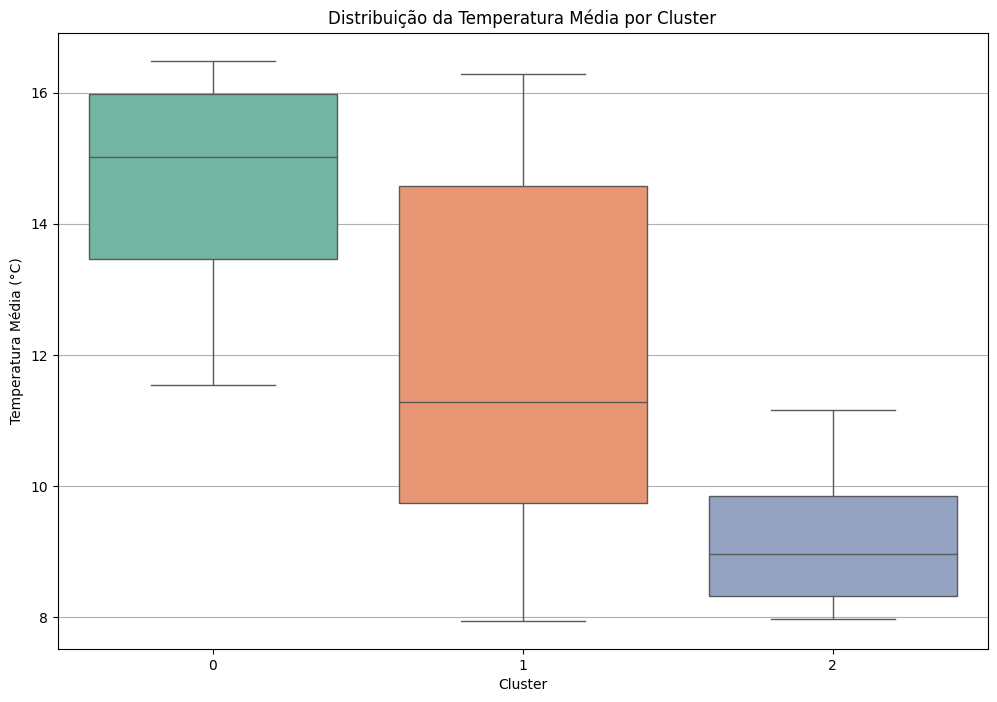

<ipython-input-70-0019d394e94e>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cluster", y="Humidity_Mean", data=weather_summary, palette="Set2")


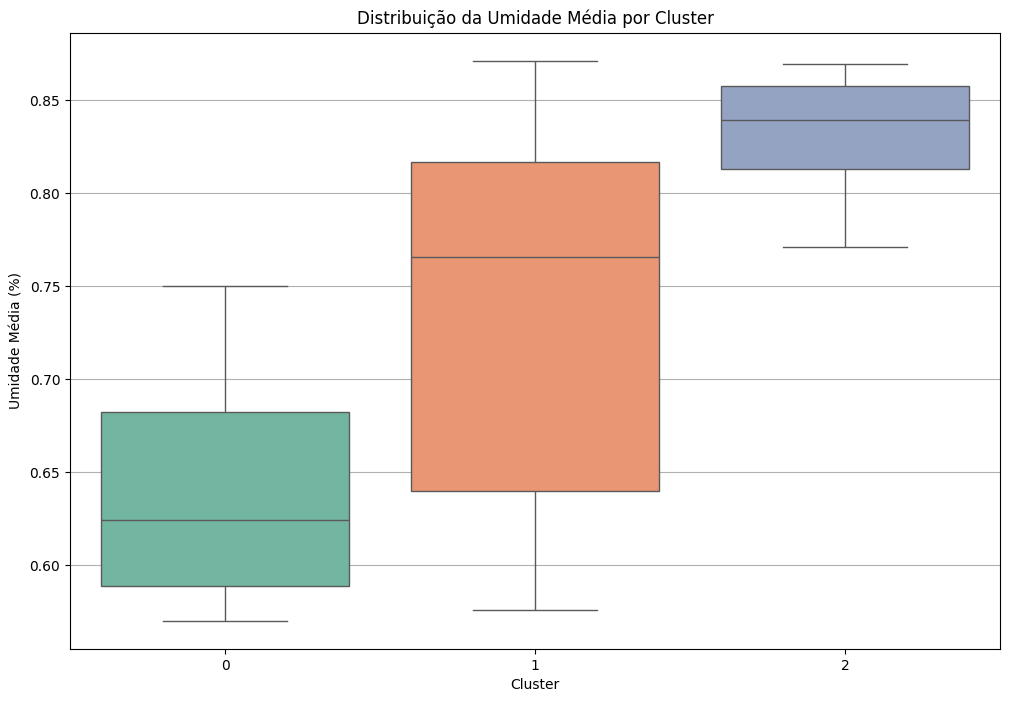

<ipython-input-70-0019d394e94e>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cluster", y="WindSpeed_Mean", data=weather_summary, palette="Set2")


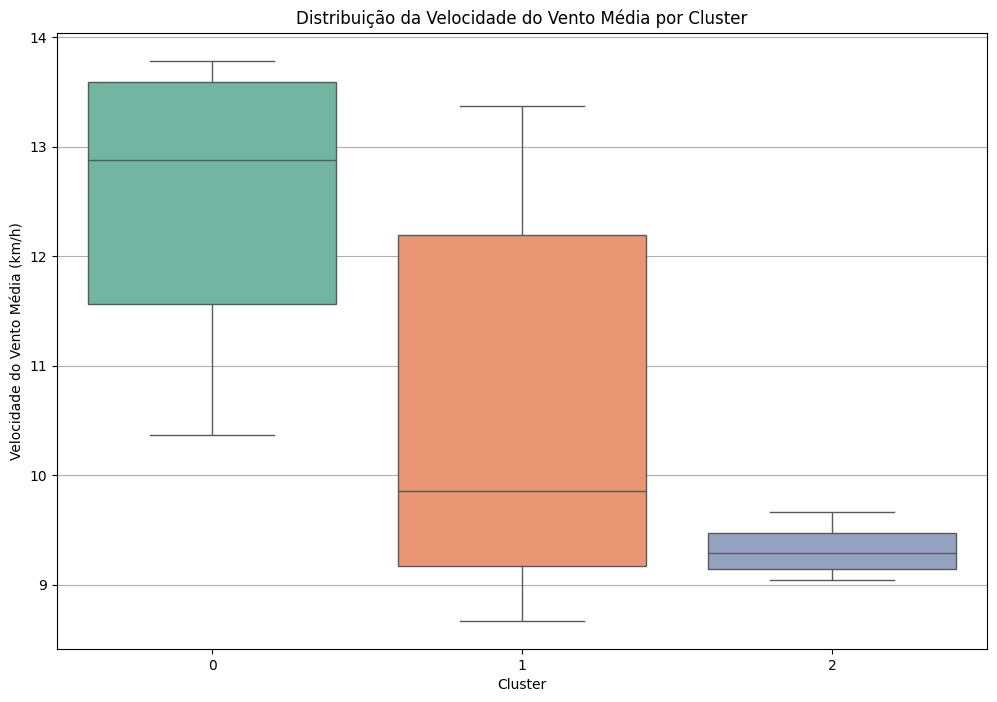

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Adicionando a coluna Cluster ao DataFrame
weather_summary['Cluster'] = kmeans_final.predict(weather_summary[['Temp_Mean', 'Humidity_Mean', 'WindSpeed_Mean', 'Visibility_Mean', 'Pressure_Mean']])

# Boxplot para Temperatura Média por Cluster
plt.figure(figsize=(12, 8))
sns.boxplot(x="Cluster", y="Temp_Mean", data=weather_summary, palette="Set2")
plt.title("Distribuição da Temperatura Média por Cluster")
plt.xlabel("Cluster")
plt.ylabel("Temperatura Média (°C)")
plt.grid(axis='y')
plt.show()

# Boxplot para Umidade Média por Cluster
plt.figure(figsize=(12, 8))
sns.boxplot(x="Cluster", y="Humidity_Mean", data=weather_summary, palette="Set2")
plt.title("Distribuição da Umidade Média por Cluster")
plt.xlabel("Cluster")
plt.ylabel("Umidade Média (%)")
plt.grid(axis='y')
plt.show()

# Boxplot para Velocidade do Vento Média por Cluster
plt.figure(figsize=(12, 8))
sns.boxplot(x="Cluster", y="WindSpeed_Mean", data=weather_summary, palette="Set2")
plt.title("Distribuição da Velocidade do Vento Média por Cluster")
plt.xlabel("Cluster")
plt.ylabel("Velocidade do Vento Média (km/h)")
plt.grid(axis='y')
plt.show()


### **Boxplots das Variáveis Meteorológicas por Cluster**

**(a) Temperatura Média por Cluster:**

- **Descrição:**
  Mostra a variação da temperatura média para cada cluster.

- **Interpretação:**
  O Cluster 0 apresenta as temperaturas mais altas (quente e seco), enquanto o Cluster 2 tem temperaturas mais baixas (frio e úmido).

**(b) Umidade Média por Cluster:**

- **Descrição:**
  Exibe a variação da umidade média para cada cluster.

- **Interpretação:**
  O Cluster 0 é o mais seco, e o Cluster 2 o mais úmido, confirmando a segmentação climática.

**(c) Velocidade do Vento Média por Cluster:**

- **Descrição:**
  Mostra a velocidade do vento média em cada cluster.

- **Interpretação:**
  As condições de vento variam entre os clusters, influenciando a eficiência.

**Relevância Geral:**
  Ilustra a segmentação de condições meteorológicas nos clusters.
  Relaciona diretamente as condições climáticas aos padrões identificados no modelo de clusterização.


## Grafico 5

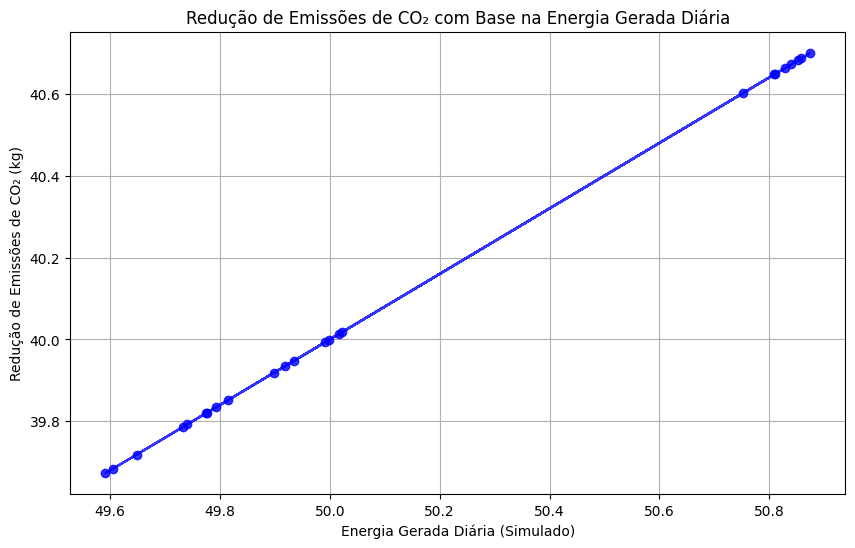

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregando o arquivo resumido
weather_summary = pd.read_csv('/content/drive/MyDrive/global/Weather_Summary_Generic.csv')

# Quinto gráfico: Redução de Emissões de CO₂ com Base na DAILY_YIELD
# Simulando a redução de emissões como proporcional à DAILY_YIELD
daily_yield = weather_summary['Pressure_Mean'] * 0.05  # Usando valores simulados de DAILY_YIELD
co2_reduction_simulated = daily_yield * 0.8  # Supondo 0.8 kg de CO2 evitados por kWh gerado

# Criando o gráfico
plt.figure(figsize=(10, 6))
plt.plot(daily_yield, co2_reduction_simulated, marker='o', linestyle='-', color='blue', alpha=0.8)
plt.title('Redução de Emissões de CO₂ com Base na Energia Gerada Diária')
plt.xlabel('Energia Gerada Diária (Simulado)')
plt.ylabel('Redução de Emissões de CO₂ (kg)')
plt.grid()
plt.show()

### **Redução de Emissões de CO₂ com Base na Energia Gerada Diária**

**Descrição:**
  Este gráfico relaciona a energia gerada diariamente com a redução de emissões de CO₂. Os valores são simulados com base em um fator proporcional (ex.: cada unidade de energia gerada evita 0.2 kg de CO₂).

**Interpretação:**
  Produções maiores estão associadas a reduções mais significativas de emissões.
  
  Destaca o impacto positivo da energia renovável no meio ambiente.

**Relevância:**
  Enfatiza a contribuição ambiental do uso de energia solar.